In [5]:
from tilepy.include.ObservationScheduler import GetUniversalSchedule
from tilepy.include.PointingTools import ObservationParameters, NextWindowTools, getdate
import time
import argparse
import os


In [6]:
# Type of followup, options: gbm, gbmpng or gw
alertType = 'gw'

# The url to the FITS file with the sky localization, e.g.for GW https://urlpath/Bayestar.fits.gz'
skymap = 'https://gracedb.ligo.org/api/superevents/S190728q/files/GW190728_064510_PublicationSamples_flattened.fits.gz,0'

# Date and time of the event in format YYYY-MM-DD HH:MM:SS. You can use 2023-07-15 14:30:10 for the example .fits file
obsTime = getdate("2023-07-27 08:30:10")

# Path to the input datasets (where galaxy cat should be for GW case)
datasetDir = '../../dataset/'

# Path to the output folder
outDir = './output'

# Config file for the tiling scheduling
#cfgFile = '../obsConfig/FollowupParameters.ini'

# Galaxy catalog name (if no catalog is given, the approach will be 2D) only. Path is given in datasetDir 
galcatName = "../../tilepy/dataset/Gladeplus.h5"

# Tiles already observed
pointingsFile = None

# Limit on skyloc to perform a followup
locCut = None

In [7]:
ObsArray = ['HESS', 'LST']
parameters = []

In [8]:
# Config file for the tiling scheduling
for i in ObsArray:
    parameters.append("../config/FollowupParameters_%s.ini" % i)
print("===========================================================================================")
print('parameters', parameters)
obsparameters = []

parameters ['../config/FollowupParameters_HESS.ini', '../config/FollowupParameters_LST.ini']


In [9]:
for j in range(len(parameters)):
    obspar = ObservationParameters()
    obspar.add_parsed_args(skymap, obsTime, datasetDir, galcatName, outDir, pointingsFile, alertType, locCut)
    obspar.from_configfile(parameters[j])
    obsparameters.append(obspar)

The file is already existing, it will be re-downloaded


Is the hotspot in the galactic plane? False
Starting the 2D pointing calculation with the following parameters

Filename:  undefined
Date:  2023-07-27 08:30:10
Dataset:  ../../dataset/
Output:  ./output/undefined

obsparameters 2
Loading HEALPix map from file: GW190728_064510_PublicationSamples_flattened.fits.gz,0
Event has triggered  Non specified  => distance = 857.56  +- 192.23  Mpc
The total probability PGW:  0.5710000000000001
     Time[UTC]      RA(deg)  DEC(deg)  PGW   Round ObsName Duration FoV
------------------- -------- -------- ------ ----- ------- -------- ---
2023-07-28 01:06:17 313.5938    8.084 0.1605     1    HESS       30 2.0
2023-07-28 01:36:17 317.1094  14.7859 0.1139     1    HESS       30 2.0
2023-07-28 01:50:13 315.3516  11.4152 0.1129     1     LST       20 2.5
2023-07-28 02:06:17 312.5391   4.7802 0.0797     1    HESS       30 2.0
2023-07-28 02:10:13 319.2188    17.27 0.0622     1     LST       20 2.5
2023-07-28 02:30:13 316.0547   6.5796 0.0218     1     LST  

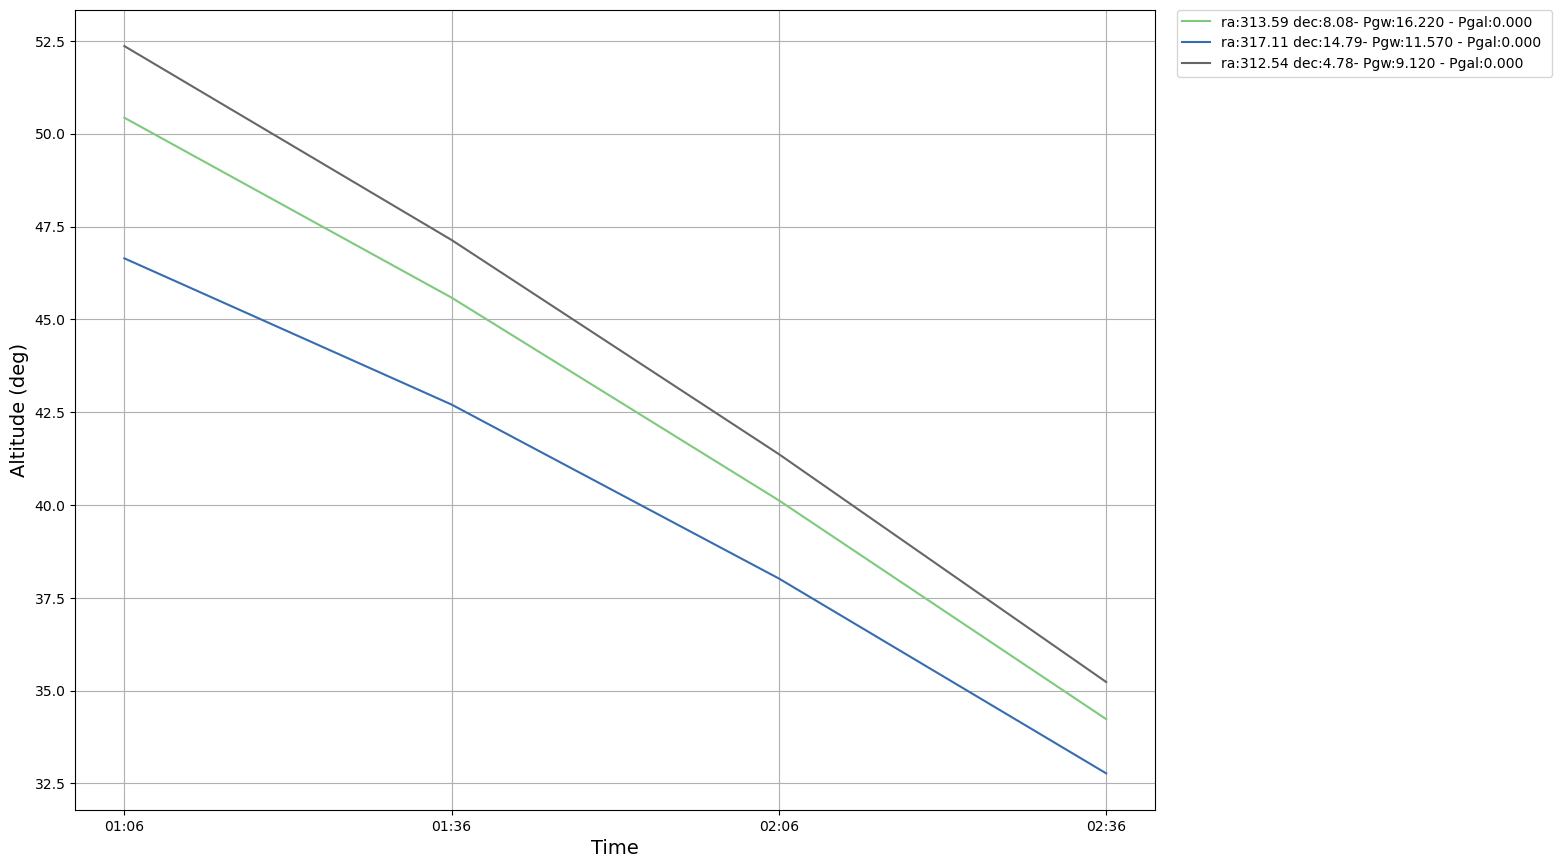

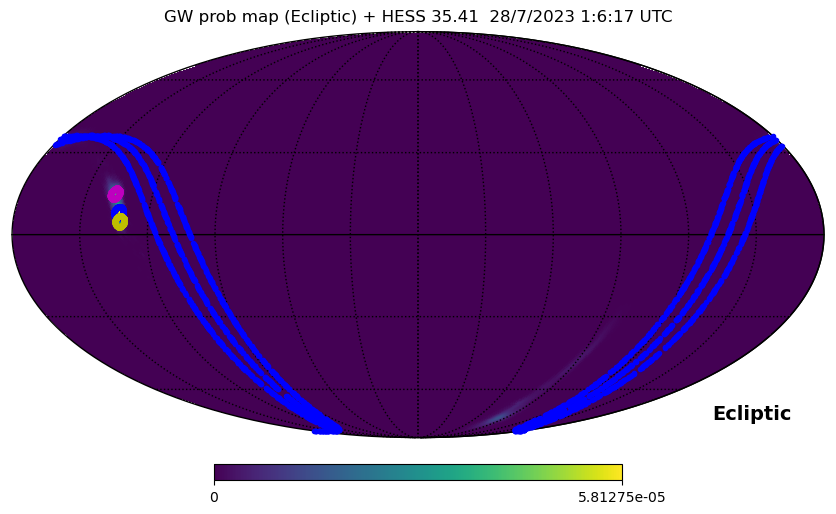

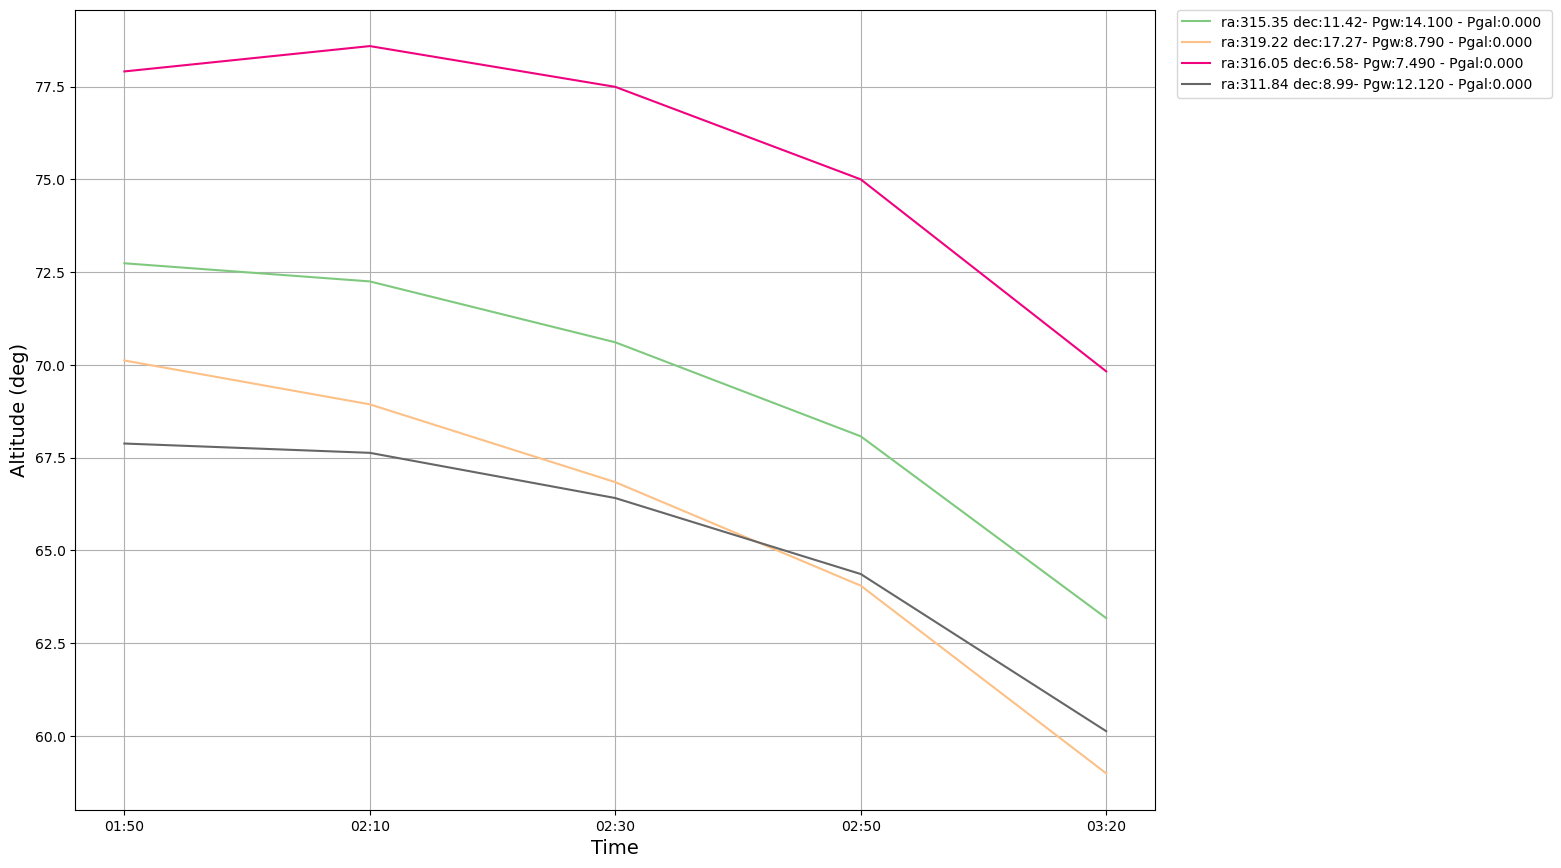

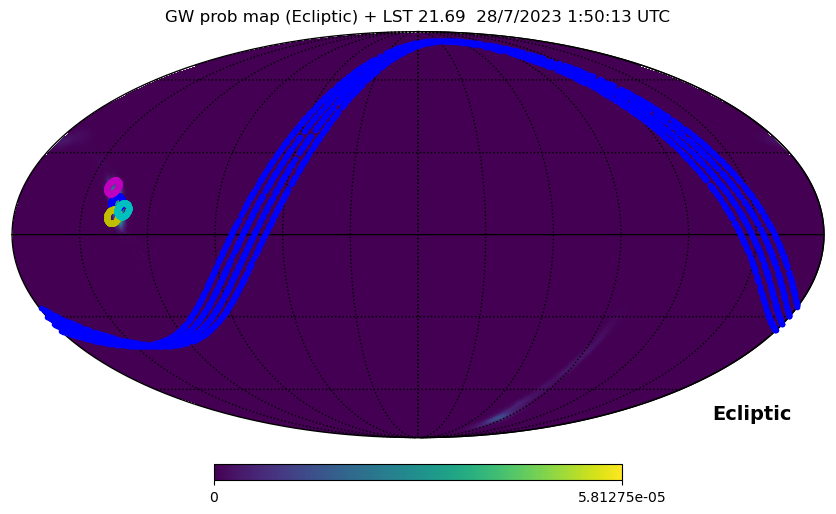

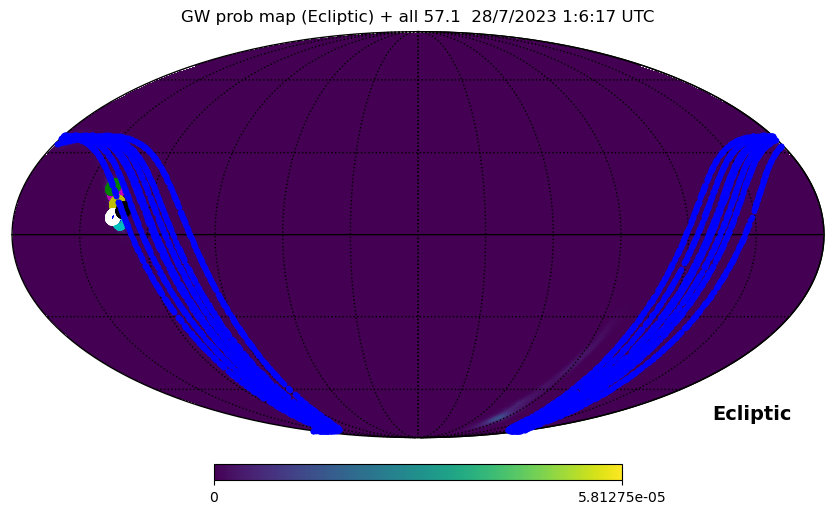

In [10]:
GetUniversalSchedule(obsparameters)